# Pymaceuticals Inc.
---

### Analysis

- 1. Out of all medications and the average tumor volumes (over 50 mm3) as a result of their treatments, Ramicane and Capomulin show to reduce tumor size more effectively.

- 2. Very minimal outliers, with one resulting from Infubinol's treatment.

- 3. Correlation between the tumor volume and the weight of the mouse show a trend amongst all test subjects.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine and display the data into a single DataFrame
df_joined = (
    mouse_metadata
    .merge(
        study_results,
        on='Mouse ID',
        how='inner'
    )
)
df_joined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df_joined.loc[:,'Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mask = (
    df_joined
    .loc[:,['Mouse ID','Timepoint']]
    .duplicated()
)
df_joined.loc[mask]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
(
    df_joined
    .query("`Mouse ID`=='g989'")
)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df_clean = (
    df_joined
    .query("(`Mouse ID`!='g989')")
)
df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
df_clean.loc[:,'Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table using grouby for mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen and assemble the resulting series into a single summary DataFrame.
(
    df_clean
    .groupby('Drug Regimen')
    .agg(
        mean_tumor_volume = ('Tumor Volume (mm3)', np.mean),
        median_tumor_volume = ('Tumor Volume (mm3)', np.median),
        tumor_volume_variance = ('Tumor Volume (mm3)', np.var),
        tumor_volume_standard_deviation = ('Tumor Volume (mm3)', np.std),
        tumor_volume_std_error = ('Tumor Volume (mm3)', st.sem),
    )
)

,mean_tumor_volume,median_tumor_volume,tumor_volume_variance,tumor_volume_standard_deviation,tumor_volume_std_error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# & Using the aggregation method, produce the same summary statistics in a single line
(
    df_clean
    .groupby('Drug Regimen')
    .agg({'Tumor Volume (mm3)':[np.mean, np.median, np.var, np.std, st.sem]})
)

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

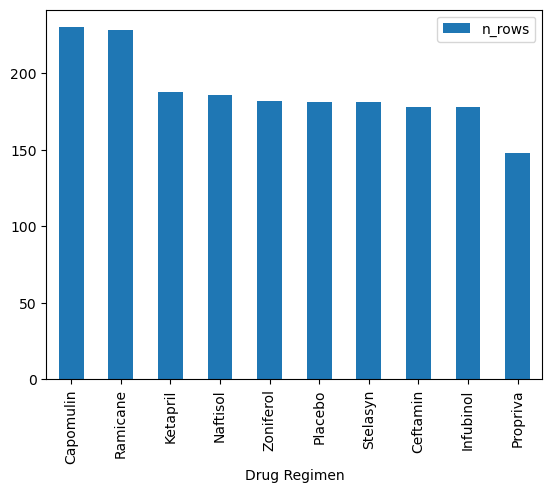

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
df_plot = (
    df_clean
    .groupby('Drug Regimen')
    .agg(
        n_rows = ('Mouse ID', len)
    )
    .sort_values('n_rows', ascending=False)
)
df_plot.plot(kind='bar')

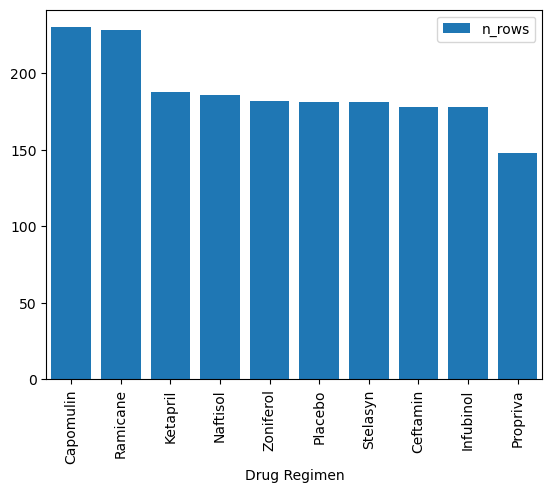

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
df_plot.plot(kind='bar')
_ = plt.bar(x=df_plot.index, height=df_plot.n_rows)
_ = plt.xticks(rotation=90)

<Axes: ylabel='Sex'>

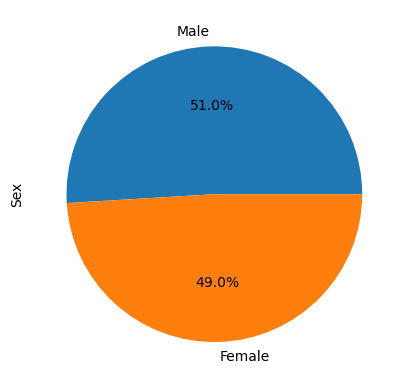

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
(
    df_clean
    .value_counts('Sex', normalize=True)
    .plot(kind='pie', label='Sex',autopct="%1.1f%%")
)

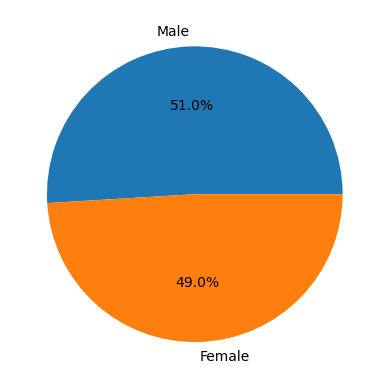

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plot_data = df_clean.value_counts('Sex', normalize=True)
_ = plt.pie(x=plot_data, labels = plot_data.index, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
df_max_timepoint = (
    df_clean
    .groupby('Mouse ID')
    .agg(
        Timepoint = ('Timepoint', np.max)
    )
    .reset_index()
)
df_max_timepoint.head()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df_clean_max = (
    df_clean
    .merge(
        df_max_timepoint,
        on=['Mouse ID','Timepoint']
    )
    .query("`Drug Regimen`.isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])")
)
df_clean_max.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers.  
    # Locate the rows which contain mice on each drug and get the tumor volumes  
    # add subset  
    # Determine outliers using upper and lower bounds

treatments_l = df_clean_max.loc[:,'Drug Regimen'].unique().tolist()
tumor_volume_l = []
treatment_l = []
for treatment in treatments_l:
    df_temp = df_clean_max.loc[df_clean_max['Drug Regimen']==treatment,'Tumor Volume (mm3)']
    q1, q3 = df_temp.quantile([0.25,0.75])
    iqr = q3 - q1
    low_limit = q1 - 1.5 * iqr
    high_limit = q3 + 1.5 * iqr
    outliers = []
    
    for value in df_temp:
        
        tumor_volume_l.append(value)
        treatment_l.append(treatment)
        
        if (value < low_limit) or (value > high_limit):
            outliers.append(value)
            
    print(f"{treatment}'s potential outliers:{outliers}, IQR:{iqr}")

Ramicane's potential outliers:[], IQR:9.098536719999998
Capomulin's potential outliers:[], IQR:7.781863460000004
Infubinol's potential outliers:[36.3213458], IQR:11.477135160000003
Ceftamin's potential outliers:[], IQR:15.577752179999997


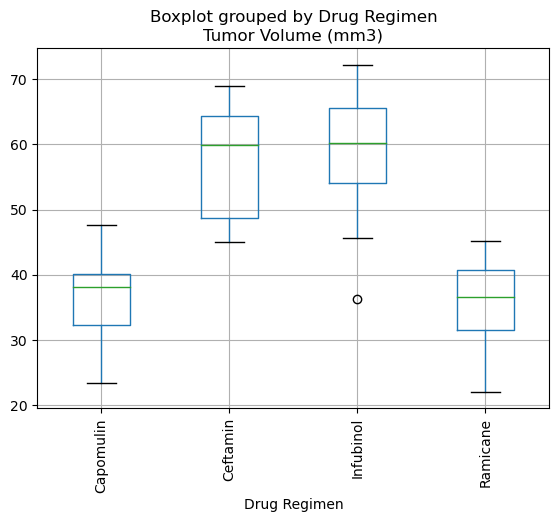

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
(
    df_clean_max
    .boxplot(by='Drug Regimen', column='Tumor Volume (mm3)')
)
_ = plt.xticks(rotation=90)

## Line and Scatter Plots

<Axes: title={'center': 'Capomulin treatment of mouse i557'}, xlabel='Timepoint'>

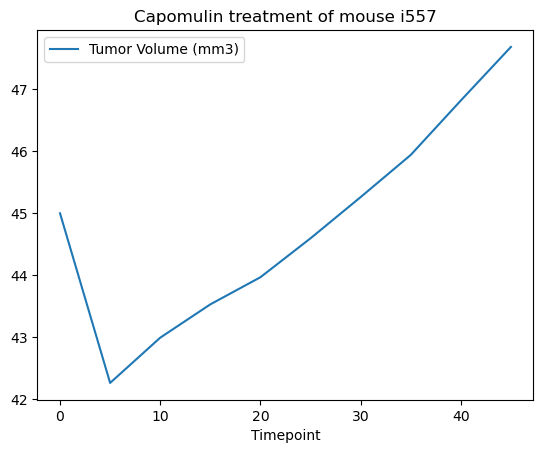

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'i557'
(
    df_clean
    .query("`Mouse ID` == @mouse_id")
    .plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', title=f"Capomulin treatment of mouse {mouse_id}" )
)

<Axes: xlabel='avg_weight', ylabel='avg_tumor_volume'>

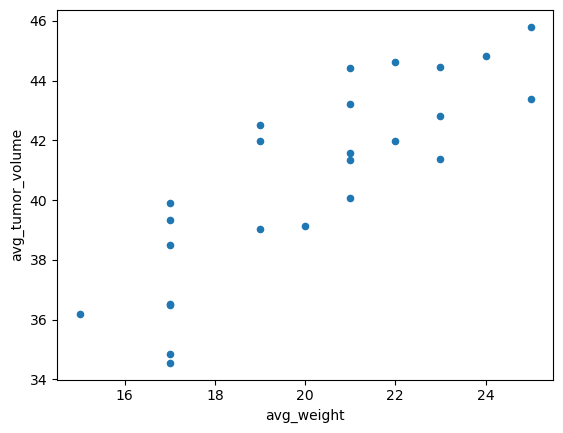

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
df_plot = (
    df_clean
    .query("`Drug Regimen` == 'Capomulin'")
    .groupby('Mouse ID')
    .agg(
        avg_tumor_volume = ('Tumor Volume (mm3)', np.mean),
        avg_weight = ('Weight (g)', np.mean)
    )
)
df_plot.plot(kind='scatter', x='avg_weight', y='avg_tumor_volume')

## Correlation and Regression

In [24]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
lr = st.linregress(x=df_plot['avg_weight'], y=df_plot['avg_tumor_volume'])
lr.intercept
lr.slope
lr

LinregressResult(slope=0.9544396890241049, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

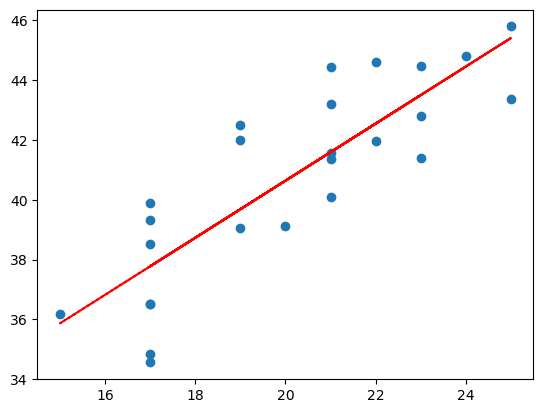

In [25]:
plt.scatter(x=df_plot['avg_weight'], y=df_plot['avg_tumor_volume'])
_ = plt.plot(df_plot['avg_weight'], lr.intercept + lr.slope * df_plot['avg_weight'], 'r--')